<a href="https://colab.research.google.com/github/Evelina-novarisya/ATS_4212211003_EvelinaNovarisyaAlifah/blob/main/4212211003_Evelina_Novarisya_A_ATS_Machine_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evelina Novarisya Alifah - 4212211003

ATS - Klasifikasi Tulisan Tangan Dengan HOG dan SVM dan Perhitungan LOOVC

Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from mlxtend.plotting import plot_confusion_matrix

Pemanggilan Datasets

In [ ]:
train_data = pd.read_csv('/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('/emnist-bymerge-test.csv', header=None)

Pembagian Samples dan perubahan Jenis bilangan ke images

In [36]:
x_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int')
x_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int')


In [ ]:
max_samples = 1000
if len(x_train) > max_samples:
    x_train = x_train[:max_samples]
    y_train = y_test[:max_samples]

In [ ]:
if len(x_test) > max_samples:
    x_test = x_test[:max_samples]
    y_test = y_test[:max_samples]

Ekstraksi datasets dengan menggunakan fitur HOG

In [21]:
hog_features_train=[]
hog_images_train = []
for image in x_train:
    feature, hog_img = hog(image.reshape((28,28)),
                          orientations = 9,
                          pixels_per_cell = (8,8),
                          cells_per_block = (2,2),
                          visualize = True,
                          block_norm = 'L2')
    hog_features_train.append(feature)
    hog_images_train.append(hog_img)
hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

hog_features_test = []
hog_images_test = []
for image in x_test:
    feature, hog_img = hog(image.reshape((28,28)),
                          orientations = 9,
                          pixels_per_cell = (8,8),
                          cells_per_block = (2,2), visualize = True,
                          block_norm = 'L2')
    hog_features_test.append(feature)
    hog_images_test.append(hog_img)

hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)

Normalisasi data HOG

In [11]:
scaler = StandardScaler ()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)

Klasifikasi data dengan SVM

In [19]:
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

Perhitungan dengan LOOVC - konfusi matriks, akurasi, presisi, recall dan F1 score

In [24]:
loo = LeaveOneOut()
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)
loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average='weighted')
loo_recall = recall_score(y_train, y_pred, average='weighted')
loo_f1 = f1_score(y_train, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
print("\nLOOCV Results (Training Data):")
print("Confusion Matrix:")
print(loo_confusion_matrix)
print("Accuracy:", loo_accuracy)
print("Precision:", loo_precision)
print("Recall:", loo_recall)
print("F1 Score:", loo_f1)


LOOCV Results (Training Data):
Confusion Matrix:
[[ 4 20  5 ...  0  0  0]
 [17 17  2 ...  0  0  1]
 [ 7 20  1 ...  0  0  0]
 ...
 [ 1  3  1 ...  0  0  0]
 [ 6 13  1 ...  0  0  0]
 [ 3 13  1 ...  0  0  0]]
Accuracy: 0.039
Precision: 0.01865774510585481
Recall: 0.039
F1 Score: 0.02148813133917281


General Table

In [27]:
def plot_confusion_mat(cm):
  fig, ax = plt.subplots(figsize=(10, 10))
  plot_confusion_matrix(conf_mat=cm, ax=ax, cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

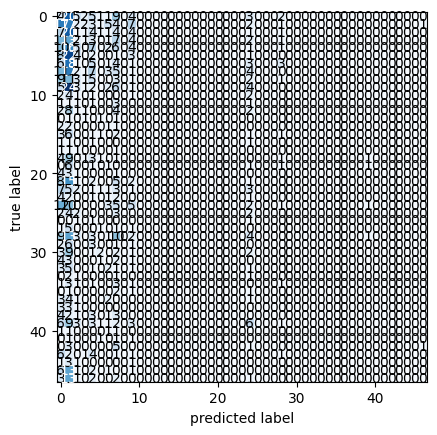

In [28]:
plot_confusion_matrix(loo_confusion_matrix)

Perbandingan gambar original dengan fitur ekstraksi HOG

In [30]:
def plot_images_with_hog(X, hog_images, title=""):
  fig, axes = plt.subplots(2, 10, figsize=(15, 5))
  fig.suptitle(title)

  # Plot original images
  for i in range(min(len(X), 10)):
    axes[0, i].imshow(X[i].reshape((28, 28)), cmap='gray')
    axes[0, i].axis('off')

  # Plot HOG images
  for i in range(min(len(hog_images), 10)):
    axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
    axes[1, i].axis('off')

  plt.show()

In [37]:
def extract_hog_images(images):
  hog_images = []
  for image in images:
    _,  hog_img = hog(image.reshape((28, 28)),
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      visualize=True,
                      block_norm='L2')
    hog_images.append(hog_img)
  return np.array(hog_images)

In [33]:
hog_images_train = extract_hog_images(x_train)

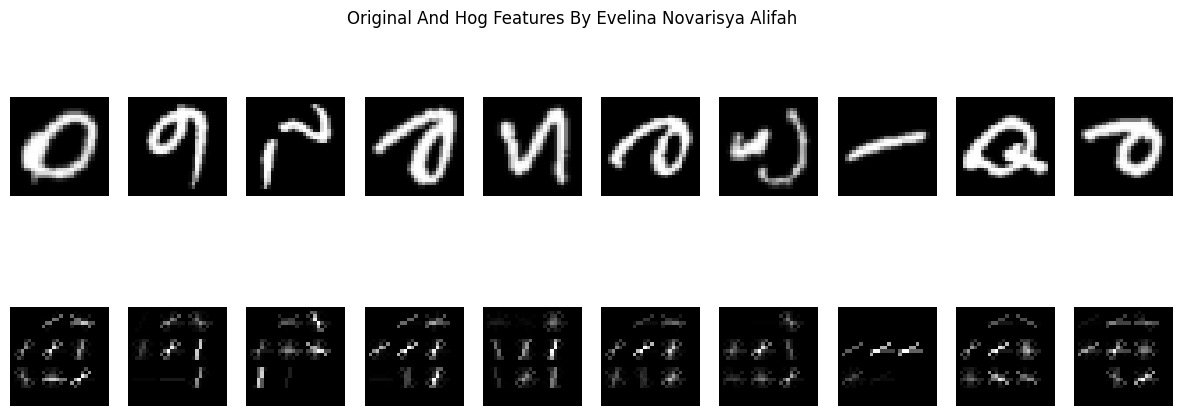

In [35]:
plot_images_with_hog(x_train, hog_images_train, title='Original And Hog Features By Evelina Novarisya Alifah')